In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np
from pandas import ExcelWriter
pd.options.mode.chained_assignment = None 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
import graphviz
from sklearn import tree

# Importing libraries to perform decision trees as well as 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from tqdm import tqdm


from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('exam 2 - noshow.csv')
dfq11 = pd.read_csv('exam 2 - question 11.csv')

In [3]:
df.corr()

,book_tod_cd,book_dow_cd,book_category_cd,last_category_cd,same_category,same_staff,last_day_services,last_receipt_tot,last_dow_cd,last_tod_cd,...,last_prod_flag,last_cumrev,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,last_cumnoshow,recency,noshow
book_tod_cd,1.000000,-0.137685,0.008052,-0.054430,0.033870,0.010798,0.023097,-0.001893,-0.070957,0.081529,...,0.025311,0.081181,0.097787,0.097523,0.072484,0.053965,0.118926,0.109284,-0.040130,0.301808
book_dow_cd,-0.137685,1.000000,-0.030644,-0.005841,-0.026196,-0.020292,0.019958,0.023026,0.081559,-0.036546,...,0.042764,0.007780,-0.002729,-0.008426,0.002878,0.023040,-0.036704,-0.009188,-0.028382,0.018668
book_category_cd,0.008052,-0.030644,1.000000,0.068486,0.021838,0.057287,-0.063596,-0.067455,-0.021898,0.005378,...,-0.101141,-0.031862,-0.024586,0.013472,-0.168036,-0.113756,-0.030496,0.003842,-0.014778,-0.002440
last_category_cd,-0.054430,-0.005841,0.068486,1.000000,-0.673103,-0.604660,-0.846507,-0.660381,0.823631,0.740567,...,-0.473418,-0.534194,-0.563482,-0.515055,-0.510970,-0.468803,-0.329216,-0.296696,-0.631680,-0.075453
same_category,0.033870,-0.026196,0.021838,-0.673103,1.000000,0.702678,0.515494,0.370389,-0.656573,-0.576092,...,0.138076,0.357909,0.373909,0.417155,0.110008,0.128518,0.215541,0.261649,0.538792,0.099962
same_staff,0.010798,-0.020292,0.057287,-0.604660,0.702678,1.000000,0.498085,0.309802,-0.614173,-0.515588,...,0.185793,0.256271,0.297336,0.301957,0.129955,0.129205,0.156406,0.208058,0.512524,0.074657
last_day_services,0.023097,0.019958,-0.063596,-0.846507,0.515494,0.498085,1.000000,0.754684,-0.704736,-0.797802,...,0.627326,0.445753,0.436425,0.374185,0.450354,0.521234,0.083740,0.151159,0.609669,0.021733
last_receipt_tot,-0.001893,0.023026,-0.067455,-0.660381,0.370389,0.309802,0.754684,1.000000,-0.475167,-0.655393,...,0.712274,0.327605,0.253683,0.207711,0.319169,0.447842,-0.026311,-0.016322,0.512730,0.023062
last_dow_cd,-0.070957,0.081559,-0.021898,0.823631,-0.656573,-0.614173,-0.704736,-0.475167,1.000000,0.645654,...,-0.259680,-0.451165,-0.490445,-0.473156,-0.321076,-0.297523,-0.306051,-0.290272,-0.582790,-0.063375
last_tod_cd,0.081529,-0.036546,0.005378,0.740567,-0.576092,-0.515588,-0.797802,-0.655393,0.645654,1.000000,...,-0.396181,-0.403322,-0.372544,-0.361284,-0.237142,-0.299171,-0.042551,-0.150548,-0.617149,-0.034271


In [10]:
df.describe()

,book_tod_cd,last_cumrev,last_cumbook,last_cumstyle,last_cumnoshow,noshow
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,2.182377,111.258197,1.906762,1.520492,0.422643,0.114754
std,0.975632,207.927702,3.315854,2.756585,1.319786,0.318807
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,132.000000,2.000000,2.000000,0.000000,0.000000
max,4.000000,1276.000000,20.000000,18.000000,9.000000,1.000000


In [ ]:
df = df.drop(['book_dow_cd','book_category_cd','last_category_cd',
              'same_category','same_staff','last_day_services','last_receipt_tot',
              'last_dow_cd','last_tod_cd','last_prod_flag','last_cumcolor',
              'last_cumprod','last_cumcancel','recency',], axis=1)

In [9]:
df = df.drop(['last_noshow',], axis=1)

In [24]:
df_train, df_test = train_test_split(df, test_size=0.30, random_state=345)

In [25]:
df_train_x = df_train.drop('noshow', axis = 1)
df_train_y = df_train['noshow']

df_test_x = df_test.drop('noshow', axis = 1)
df_test_y = df_test['noshow']

In [26]:
formula = 'noshow ~ book_tod_cd + last_cumrev + last_cumbook + last_cumstyle + last_cumnoshow'
result = smf.logit(formula = str(formula), data = df_train).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.293823
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 noshow   No. Observations:                 1366
Model:                          Logit   Df Residuals:                     1360
Method:                           MLE   Df Model:                            5
Date:                Wed, 08 Apr 2020   Pseudo R-squ.:                  0.1763
Time:                        20:39:44   Log-Likelihood:                -401.36
converged:                       True   LL-Null:                       -487.26
Covariance Type:            nonrobust   LLR p-value:                 3.006e-35
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.5687      0.294    -15.532      0.000      -5.145      -3.992
book_tod_cd        0.9341      0.098      9.501      0.000       0.741       1.127
last_cumrev        0.0049      0.001      3.659      0.000       0.002       0.007
last_cumbook      -0.6120      0.145     -4.235      0.000      -0.895      -0.329
last_cumstyle      0.4027      0.164      2.450      0.014       0.081       0.725
last_cumnoshow     0.2255      0.114      1.970      0.049       0.001       0.450
==================================================================================
"""

In [43]:
df_train['prob'] = pd.DataFrame(result.predict(df_train))
df_train['pred'] = [0 if x<  .5  else 1 for x in df_train['prob']]
df_test['prob'] = pd.DataFrame(result.predict(df_test))
df_test['pred'] = [0 if x<  .5  else 1 for x in df_test['prob']]

In [45]:
accuracy_score(df_train['noshow'], df_train['pred'])

0.8799414348462665

In [46]:
accuracy_score(df_test['noshow'], df_test['pred'])

0.8754266211604096

In [27]:
clf_svm=svm.SVC()

In [28]:
clf_svm.fit(df_train_x, df_train_y)

C:\Users\zainl\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
SVM_predict = clf_svm.predict(df_train_x)
accuracy_score(SVM_predict, df_train_y)

0.9399707174231332

In [39]:
SVM_predict_test = clf_svm.predict(df_test_x)
accuracy_score(SVM_predict_test, df_test_y)

0.9044368600682594

In [29]:
treeClassifier = DecisionTreeClassifier(criterion = 'entropy',  max_depth = 5)

In [30]:
treeClassifier.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [47]:
DT_predict = treeClassifier.predict(df_train_x)
accuracy_score(DT_predict, df_train_y)

0.924597364568082

In [49]:
DT_predict_test = treeClassifier.predict(df_test_x)
accuracy_score(DT_predict_test, df_test_y)

0.9163822525597269

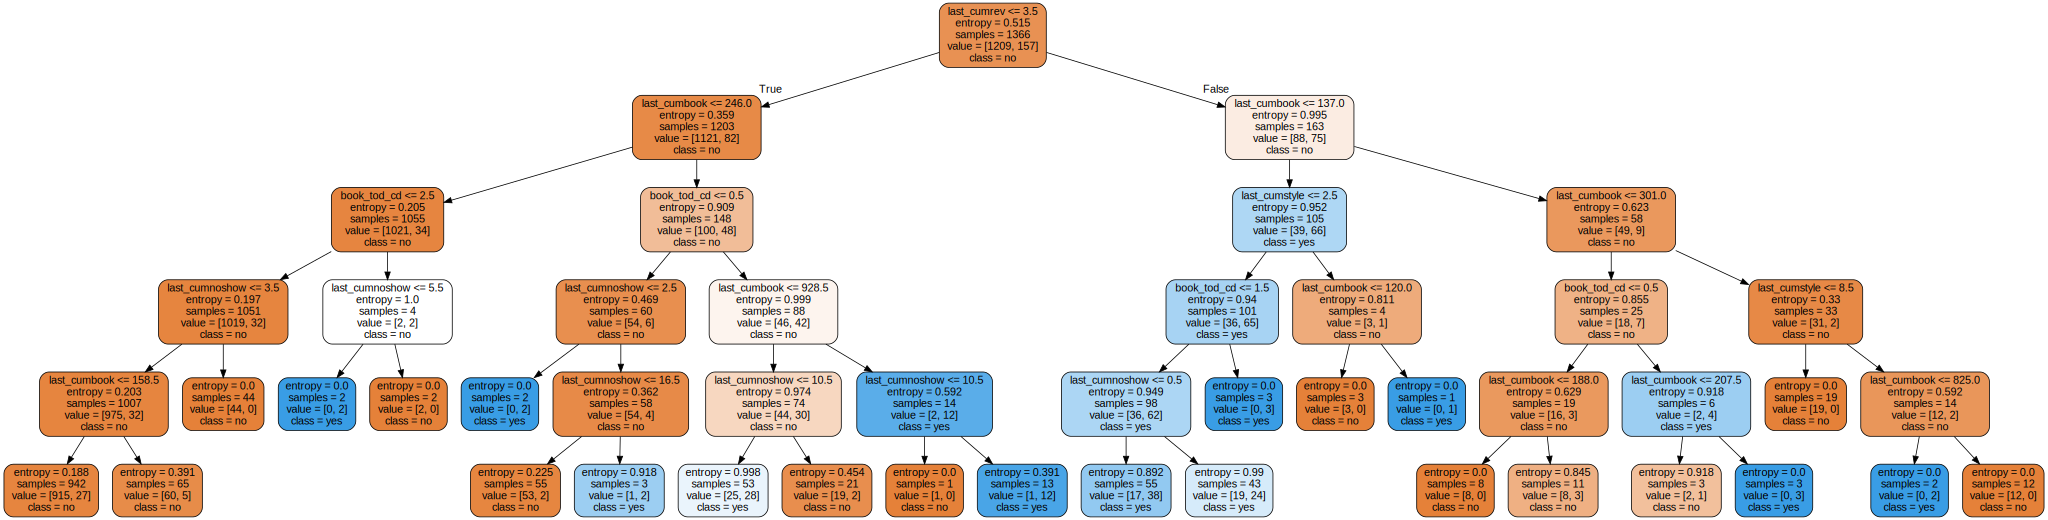

In [35]:
featureNames=['last_cumrev','last_cumbook','last_cumnoshow','last_cumstyle','book_tod_cd']
classNames =["no","yes"]
dot_data = tree.export_graphviz(decision_tree=treeClassifier, feature_names=featureNames, 
                                class_names=classNames,filled=True,rounded=True, max_depth=5
                            )
graph = graphviz.Source(dot_data) 
graph

In [51]:
precision_score(df_test_y, SVM_predict_test) 

0.72

In [52]:
precision_score(df_test_y, DT_predict_test) 

0.625

In [53]:
precision_score(df_test['noshow'], df_test['pred']) 

0.3125

In [54]:
recall_score(df_test_y, SVM_predict_test)

0.26865671641791045

In [55]:
recall_score(df_test_y, DT_predict_test)

0.6716417910447762

In [56]:
recall_score(df_test['noshow'], df_test['pred'])

0.07462686567164178

In [57]:
confusion_matrix(df_test_y, SVM_predict_test)

array([[512,   7],
       [ 49,  18]], dtype=int64)

In [58]:
tn_SVM, fp_SVM, fn_SVM, tp_SVM = confusion_matrix(df_test_y, SVM_predict_test).ravel()

In [59]:
confusion_matrix(df_test_y, DT_predict_test)

array([[492,  27],
       [ 22,  45]], dtype=int64)

In [61]:
tn_DT, fp_DT, fn_DT, tp_DT = confusion_matrix(df_test_y, DT_predict_test).ravel()

In [62]:
confusion_matrix(df_test['noshow'], df_test['pred'])

array([[508,  11],
       [ 62,   5]], dtype=int64)

In [63]:
tn_L, fp_L, fn_L, tp_L = confusion_matrix(df_test['noshow'], df_test['pred']).ravel()

In [64]:
specificity_SVM = tn_SVM / (tn_SVM + fp_SVM)
specificity_SVM

0.9865125240847784

In [65]:
specificity_DT = tn_DT / (tn_DT + fp_DT)
specificity_DT

0.9479768786127167

In [66]:
specificity_L = tn_L / (tn_L + fp_L)
specificity_L

0.9788053949903661

In [67]:
DT_fpr, DT_tpr, _ = roc_curve(df_test_y, DT_predict_test)
SVM_fpr, SVM_tpr, _ = roc_curve(df_test_y, SVM_predict_test)
L_fpr, L_tpr, _ = roc_curve(df_test['noshow'], df_test['pred'])

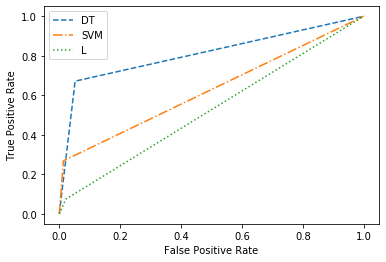

In [69]:
plt.plot(DT_fpr, DT_tpr, linestyle='--', label='DT')
plt.plot(SVM_fpr, SVM_tpr, linestyle='-.', label='SVM')
plt.plot(L_fpr, L_tpr, linestyle=':', label='L')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()
# show the plot
plt.show()

In [71]:
DT_auc = roc_auc_score(df_test_y, DT_predict_test)
DT_auc

0.8098093348287464

In [72]:
SVM_auc = roc_auc_score(df_test_y, SVM_predict_test)
SVM_auc

0.6275846202513443

In [73]:
L_auc = roc_auc_score(df_test['noshow'], df_test['pred'])
L_auc

0.526716130331004

In [77]:
dfq11 = dfq11.drop(['book_dow_cd','book_category_cd','last_category_cd',
              'same_category','same_staff','last_day_services','last_receipt_tot',
              'last_dow_cd','last_tod_cd','last_prod_flag','last_cumcolor',
              'last_cumprod','last_cumcancel','recency','last_noshow',], axis=1)

In [79]:
dfq11 = dfq11.drop(['Unnamed: 0',], axis=1)

In [80]:
dfq11.head()

,book_tod_cd,last_cumrev,last_cumbook,last_cumstyle,last_cumnoshow
0,1,0,0,0,0
1,1,0,0,0,0
2,2,0,1,0,0
3,3,132,2,2,0
4,4,1276,20,18,9


In [82]:
predict = clf_svm.predict(dfq11)
predict

array([0, 0, 0, 0, 0], dtype=int64)

In [83]:
predictdt = treeClassifier.predict(dfq11) 
predictdt

array([0, 0, 0, 0, 0], dtype=int64)

In [84]:
predictlog = result.predict(dfq11)
predictlog

0    0.025716
1    0.025716
2    0.035146
3    0.175849
4    0.916405
dtype: float64